In [109]:
import pandas as pd

In [110]:
Comments=pd.read_csv("Comments.csv")
Posts=pd.read_csv("Posts.csv")
Users=pd.read_csv("Users.csv")

Zadanko 1 

Mamy narysować histogram ilości komentarzy przypisanych do postów. Skorzystam z funkcji hist wykonanej na argumencie CommentCount w ramce Posts, ponieważ oferuje nam ona dokładnie to czego szukamy przy tworzeniu histogramu - liczbę komentarzy pod każdym z postów.

array([[<AxesSubplot:title={'center':'CommentCount'}>]], dtype=object)

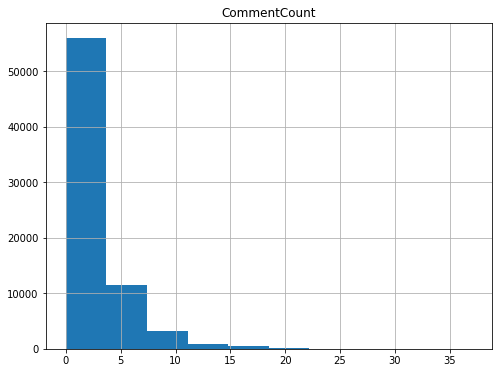

In [111]:
Posts.hist('CommentCount', figsize=(8, 6))

Zadanko 2 

Wypisz nazwę (DisplayName, nie Id!) użytkownika, dla którego suma wyświetleń jego postów jest największa. Wskazówka: aby wyciągnąć odpowiedni OwnerUserId z Posts można użyć .loc, .iloc lub .values.

In [112]:
Posts[['OwnerUserId','ViewCount']]\
.groupby('OwnerUserId')\
.sum()\
.sort_values(by='ViewCount', ascending=False)\
.head(1)\
.merge(Users[['Id','DisplayName']], left_on='OwnerUserId',right_on='Id')\
.drop(['ViewCount','Id'], axis=1)


,DisplayName
0,Mark Mayo


Zadanko 3 

Wyświetl nazwę użytkownika, który ma drugą największą liczbę odpowiedzi (również znajdujących się w ramce Posts) oznaczonych jako zaakceptowane rozwiązanie.

In [113]:
Posts[Posts['AcceptedAnswerId'].notna()].groupby('OwnerUserId')\
.size()\
.reset_index(name='odpowiedzi')\
.sort_values('odpowiedzi', ascending=False)\
.head(2)\
.sort_values('odpowiedzi', ascending=True)\
.merge(Users[['Id','DisplayName']],left_on='OwnerUserId',right_on="Id")\
.head(1)\
.drop(['OwnerUserId','Id','odpowiedzi'], axis=1)

,DisplayName
0,hippietrail


Zadanko 4 

Wyświetl odsetek postów, dla których odpowiedź zaakceptowana ma niższy wynik niż odpowiedź o najwyższym wyniku.

In [114]:
wynik_zaakceptowanej=Posts[Posts['AcceptedAnswerId'].notna()][['AcceptedAnswerId']]\
.merge(Posts,left_on='AcceptedAnswerId',right_on='Id')[['Score','ParentId']]\
.rename(columns={'Score':'wynik'})
Posts['Score']=Posts['Score'].fillna(0)
wynik_maksymalny=Posts[Posts['PostTypeId']==2].groupby('ParentId')[['Score']]\
.max()
mianownik=wynik_zaakceptowanej.merge(wynik_maksymalny,on='ParentId')
licznik=mianownik[mianownik['wynik']<mianownik['Score']]
odpowiedz=len(licznik)/len(mianownik)
odpowiedz

0.09044220055710306